# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [33]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv")

df['Categoria'] = df['Categoria'].str.replace('lacteos', 'laticinios', regex=False)
df['Categoria'] = df['Categoria'].str.replace('belleza-y-cuidado-personal', 'beleza-e-cuidado-pessoal', regex=False)
df['Categoria'] = df['Categoria'].str.replace('instantaneos-y-sopas', 'instantaneo-e-sopas', regex=False)

df.head(11)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,laticinios
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,laticinios
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,laticinios
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,laticinios
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,laticinios
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,laticinios
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,laticinios
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,laticinios
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,laticinios
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,laticinios


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [35]:
#Seu código aqui para a média
df.groupby('Categoria')['Preco_Normal'].mean().reset_index().sort_values(by='Preco_Normal', ascending=False)

,Categoria,Preco_Normal
1,comidas-preparadas,3095.043478
5,laticinios,2385.219239
2,congelados,2108.042553
0,beleza-e-cuidado-pessoal,1783.556485
3,frutas,1724.473684
6,verduras,1343.296875
4,instantaneo-e-sopas,765.491228


In [37]:
#Seu código aqui para a mediana
df.groupby('Categoria')['Preco_Normal'].median().reset_index().sort_values(by='Preco_Normal', ascending=False)

,Categoria,Preco_Normal
1,comidas-preparadas,3290.0
0,beleza-e-cuidado-pessoal,1569.0
2,congelados,1519.0
3,frutas,1195.0
6,verduras,1180.0
5,laticinios,989.0
4,instantaneo-e-sopas,439.0


Digite aqui as categorias: laticinios, congelados e frutas

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [39]:
#Seu código aqui
df.groupby('Categoria')['Preco_Normal'].std().reset_index().sort_values(by='Preco_Normal', ascending=False)

,Categoria,Preco_Normal
5,laticinios,3925.816164
0,beleza-e-cuidado-pessoal,2210.041719
2,congelados,2111.539896
1,comidas-preparadas,2019.911428
3,frutas,1639.151114
4,instantaneo-e-sopas,1170.232869
6,verduras,1012.699625


Digite nesse campo o comportamento que você identificou: O desvio padrão está muito alto para as categorias lacteos, belleza-y-cuidado-personal e comidas-preparadas

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

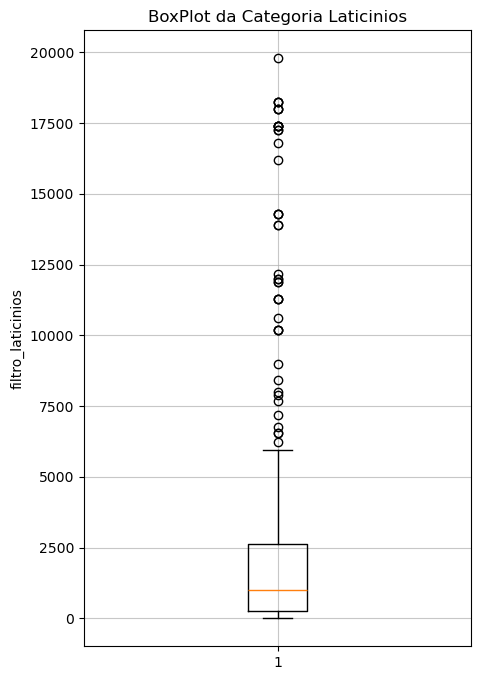

In [41]:
#Seu código aqui
#No grafico do boxplot é possivel ver uma grande quantidade de outliers no preço normal da categoria 'lacteos'.
filtro_laticinios = df[df['Categoria'] == 'laticinios']

plt.figure(figsize=(5,8))
plt.boxplot(filtro_laticinios['Preco_Normal'])
plt.title('BoxPlot da Categoria Laticinios')
plt.ylabel('filtro_laticinios')
plt.grid(True, linestyle='-', alpha=0.7)
plt.show()

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

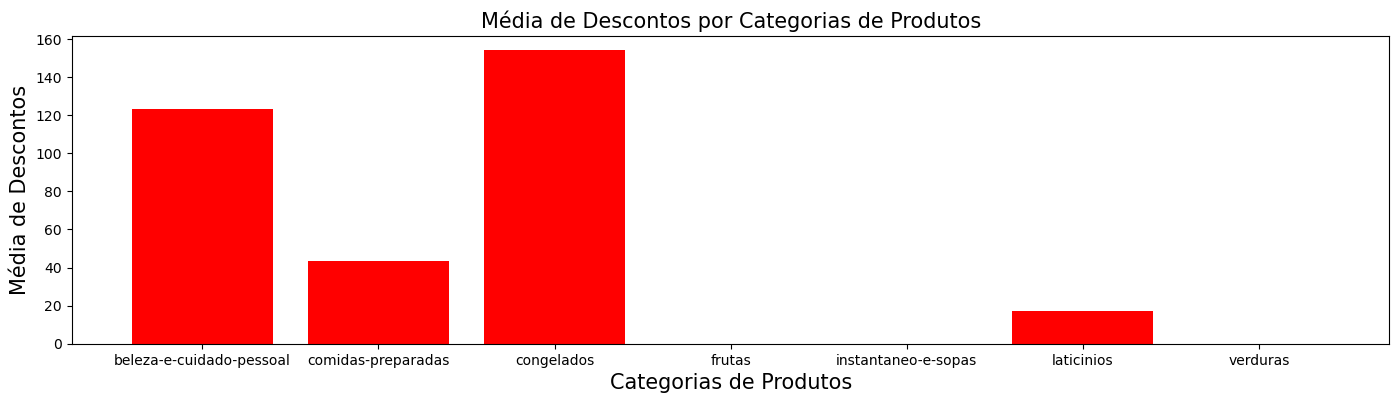

In [43]:
# Seu código aqui

plt.figure(figsize=(17,4))
desconto_por_categoria = df.groupby('Categoria')['Desconto'].mean()
plt.bar(desconto_por_categoria.index, desconto_por_categoria, color='red')
plt.title('Média de Descontos por Categorias de Produtos', fontsize=15)
plt.xlabel('Categorias de Produtos', fontsize=15)
plt.ylabel('Média de Descontos', fontsize=15)
plt.xticks(rotation=0)
plt.show()

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

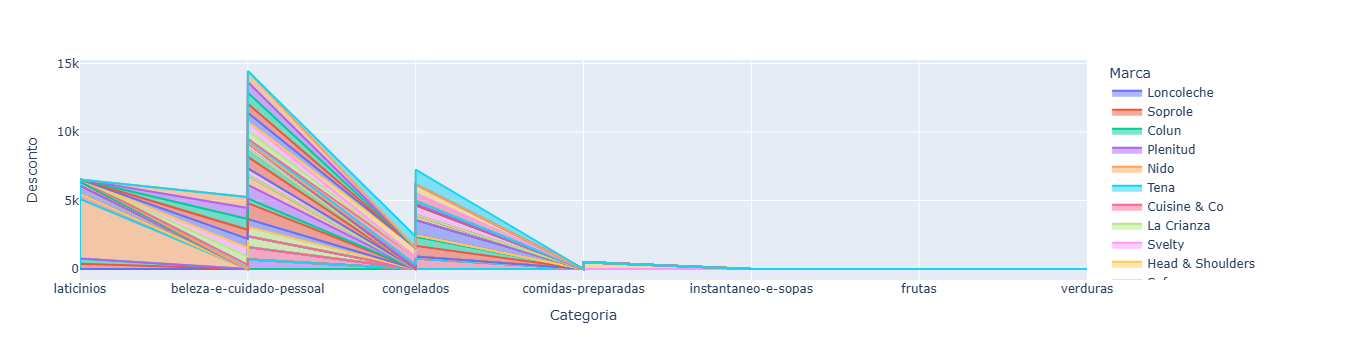

In [45]:
# Seu código aqui
fig = px.area(df, x="Categoria", y="Desconto", color="Marca", line_group="Marca")
fig.show()